In [1]:
import pandas as pd 

data    = pd.read_csv('phoible.csv')
locs    = pd.read_csv('languages_and_dialects_geo.csv')
spanish = data[data['LanguageName'].apply(lambda x: 'spanish' in x.lower())]

merged  = pd.merge(data[['LanguageName', 'Phoneme', 'ISO6393']], \
                  locs[['name', 'latitude', 'longitude', 'level', 'isocodes']], \
                  left_on='ISO6393', right_on='isocodes')

merged  = merged.dropna()


/var/folders/l9/y8y3rmys2sl93tzzph3dl7jw0000gr/T/ipykernel_80516/1610031829.py:3: DtypeWarning: Columns (4,7,8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  data    = pd.read_csv('phoible.csv')


In [3]:
spanish['SpecificDialect'].value_counts()

Spanish (Murcian)           45
Castilian Spanish           38
Istanbul Judeo-Spanish      34
Judaeo-Spanish (Beiruti)    25
Spanish (Castilian)         25
Name: SpecificDialect, dtype: int64

In [87]:
merged.to_csv('merged.csv')

In [81]:
audio_feats = ['Phoneme', 'SegmentClass'] + list(data.columns[11:])

In [85]:
tmp = data[audio_feats].drop_duplicates()
a = tmp.iloc[0]
a[a == '+']

continuant        +
delayedRelease    +
spreadGlottis     +
Name: 0, dtype: object

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

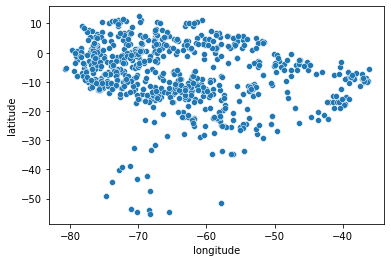

In [71]:
import seaborn as sns

# sns.scatterplot(x='longitude', y='latitude', data=locs)

# plt.figure(figsize=(10, 10))

locs = locs[locs['macroarea'] == 'South America']
sns.scatterplot(x='longitude', y='latitude', data=locs)


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

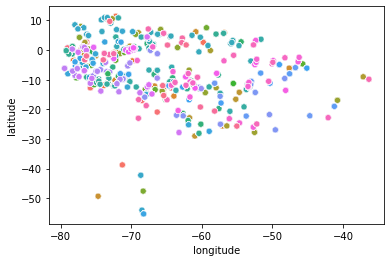

In [63]:
sns.scatterplot(x='longitude', y='latitude', data=merged, hue='LanguageName', legend=False)

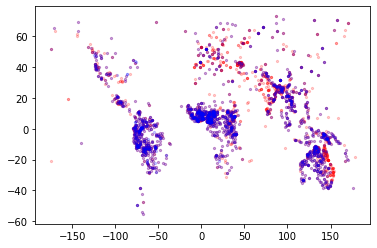

In [48]:
from matplotlib import pyplot as plt

m = merged[merged['Phoneme'] == 'm']
u = merged[merged['Phoneme'] == 't']

plt.scatter(m['longitude'], m['latitude'], c='r', label='m', s=5, alpha=0.2)
plt.scatter(u['longitude'], u['latitude'], c='b', label='u', s=5, alpha=0.2)

In [7]:
lang_ph = data.groupby(['LanguageName', 'Phoneme']).size().unstack().fillna(0)

In [16]:
english = lang_ph.loc['English']
spanish = lang_ph.loc['Spanish']

diff = english - spanish

In [19]:
diff[diff != 0]

Phoneme
a     -2.0
ai    -1.0
ai̯   -1.0
au    -1.0
au̯   -1.0
      ... 
ʒ      3.0
ʔ      1.0
β     -1.0
θ     -1.0
χ     -1.0
Length: 112, dtype: float64

In [77]:
lang_ph.sum().sort_values()[-25:]

Phoneme
ɛ      1129.0
ʔ      1132.0
t̠ʃ    1218.0
ɲ      1256.0
f      1330.0
r      1332.0
d      1376.0
h      1703.0
ɡ      1712.0
o      1826.0
e      1842.0
ŋ      1898.0
b      1906.0
s      2021.0
l      2044.0
t      2064.0
n      2350.0
w      2483.0
p      2593.0
a      2600.0
u      2646.0
j      2716.0
k      2729.0
i      2779.0
m      2915.0
dtype: float64

In [67]:
lang_country.head()

,glottocode,name,isocodes,level,macroarea,latitude,longitude
0,3adt1234,3Ad-Tekles,NaN,dialect,Africa,NaN,NaN
1,aala1237,Aalawa,NaN,dialect,Papunesia,NaN,NaN
2,aant1238,Aantantara,NaN,dialect,Papunesia,NaN,NaN
3,aari1239,Aari,aiw,language,Africa,5.95034,36.5721
4,aari1240,Aariya,aay,language,Eurasia,NaN,NaN


In [69]:
merged = pd.merge(lang_ph, lang_country, left_on='LanguageName', right_on='name')

In [70]:
merged.head()

,N,R,Rʲ,R̪,R̪|R,R̪̥|R̥,R̪̰|R̰,a,ae,ae̞,...,↓˦↓˦,ⱱ,ⱱ̟,glottocode,name,isocodes,level,macroarea,latitude,longitude
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,aari1239,Aari,aiw,language,Africa,5.950340,36.572100
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,abau1245,Abau,aau,language,Papunesia,-3.972220,141.324000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,abid1235,Abidji,abi,language,Africa,5.656560,-4.584210
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,abip1241,Abipon,axb,language,South America,-29.000000,-61.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,abkh1244,Abkhaz,abk,language,Eurasia,43.056218,41.159115


In [87]:
merged['name'].unique().shape

(1190,)

In [37]:


data.groupby('LanguageName').apply(lambda x: len(x['Phoneme'].unique())).sort_values()

LanguageName
Pirahã             11
ROTOKAS            11
PIRAHA             11
HAWAIIAN           13
NASIOI             13
                 ... 
Kildin Saami      128
Bengali           130
Soghpo Tibetan    133
!XU               141
!Xóõ            161
Length: 2716, dtype: int64